<a href="https://colab.research.google.com/github/907Resident/caldera-gas-emissions/blob/logistic-prediction/site_differentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Site Differentation
How are the sites similar and/or different.

## Importing necessary libraries

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Import data
The data have been processed using code developed in MATLAB previously. The data is currently stored in a OneDrive directory. Therefore to access it, one will need to use [`onedrivesdk<2`](https://github.com/OneDrive/onedrive-sdk-python/blob/master/README.md#onedrive). This library will be able to tap into the OneDrive API. After user authentication, you can get the necesary files for this exercise. 

_need to return to get `onedrivesdk` working properly_

In [ ]:
#!pip install "onedrivesdk<2"

     |████████████████████████████████| 204kB 5.6MB/s 
  Created wheel for onedrivesdk: filename=onedrivesdk-1.1.8-cp36-none-any.whl size=147150 sha256=c2e10c2ad86165a776de2a97b73297d69fc07c78def8e870ba7d87740b65229c
  Stored in directory: /root/.cache/pip/wheels/8f/0c/f0/fe6e0677e05a8bfbd6c2b8d2034db9bcdc03f365545a990fff
Successfully built onedrivesdk


In [ ]:
'''
# Import packages from `ondrivesdk`
import onedrivesdk
from onedrivesdk.helpers import GetAuthCodeServer
from onedrivesdk.helpers.resource_discovery import ResourceDiscoveryRequest

redirect_uri = 'http://localhost:8080/' 
client_secret = 'txwlRACN800:~abtZDV08@=' 
client_id='9603342a-0630-4e1c-9fb1-fe97746511ae' 
api_base_url= 'https://graph.microsoft.com/v1.0/' 
scopes=['wl.signin', 'wl.offline_access', 'onedrive.readwrite'] 
http_provider = onedrivesdk.HttpProvider() 
auth_provider = onedrivesdk.AuthProvider(http_provider=http_provider, 
                                         client_id=client_id, 
                                         scopes=scopes) 
client = onedrivesdk.OneDriveClient(api_base_url, auth_provider, 
                                    http_provider) 
auth_url = client.auth_provider.get_auth_url(redirect_uri) 
print(auth_url)
code = "https://login.live.com/oauth20_authorize.srf?client_id=64bdfc12-0546-4082-beb4-8504880da74e&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=wl.signin+wl.offline_access+onedrive.readwrite"
client.auth_provider.authenticate(code, redirect_uri, client_secret)
'''

https://login.live.com/oauth20_authorize.srf?client_id=9603342a-0630-4e1c-9fb1-fe97746511ae&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=wl.signin+wl.offline_access+onedrive.readwrite


Exception: ignored

Using manual file upload until issue #1 is resolved

In [ ]:
# Manual File Upload from local drive
from google.colab import files
uploaded2018 = files.upload()

Saving YNP_SummaryData.xlsx to YNP_SummaryData.xlsx


In [ ]:
# Import file into workspace
import io
df_2018_YC = pd.read_excel(io.BytesIO(uploaded2018['YNP_SummaryData.xlsx']), 
                           sheet_name="2018",
                           header=0)
# Delete first row that contains secondary data information
df_2018_YC.drop([0], inplace=True)

# Reset index
df_2018_YC.reset_index(drop=True, inplace=True)

# Preview data
df_2018_YC.head()

,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source,Horita_Geothermometer_Temperature_at_Formation,Ambient_Temperature,Barometric_Pressure,Soil_Moisture,Soil_Conductivity,Soil_Tempeature_at_Surface,Soil_Tempeature_at_6_in_depth
0,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.1,Acid-Sulphate,44.7447,-110.713,2018-06-20 00:00:00,2018-06-20 11:48:30,2018-06-20 12:08:00,19.5,0.0001738,0.00152353,7.14093,-142.064,156.346,214.948,1.88424,-5.56615,-5.87406,-5.25824,-5.87406,-5.25824,1.11546e+11,NaN,NaN,1.31763,714.47
1,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.2,Acid-Sulphate,44.7448,-110.713,2018-06-20 00:00:00,2018-06-20 12:22:30,2018-06-20 12:42:00,19.5,-0.000784411,-0.00687615,-116.363,-386.473,153.747,437.633,3.83629,-19.2932,-19.4558,-19.1307,-19.4558,-19.1307,-29.0515,NaN,NaN,1.31647,778.056
2,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.3,Acid-Sulphate,44.7448,-110.713,2018-06-20 00:00:00,2018-06-20 12:56:30,2018-06-20 13:15:59,19.4833,-0.00236666,-0.0207461,36.94,-59.3935,133.273,215.394,1.88815,-23.4323,-23.7177,-23.1469,-23.7177,-23.1469,450282228398209761280,NaN,NaN,1.31442,737.47
3,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.1,Acid-Sulphate,44.745,-110.713,2018-06-20 00:00:00,2018-06-20 13:32:33,2018-06-20 13:51:57,19.4,-0.00125964,-0.011042,31.0104,-84.1555,146.176,347.507,3.04624,-22.9485,-23.1399,-22.757,-23.1399,-22.757,503872814901302919168,NaN,NaN,1.31679,688.697
4,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.2,Acid-Sulphate,44.745,-110.713,2018-06-20 00:00:00,2018-06-20 14:07:30,2018-06-20 14:27:00,19.5,-0.000472218,-0.00413946,317.581,-88.6927,723.856,350.529,3.07273,-19.3013,-19.5028,-19.0999,-19.5028,-19.0999,251936407216017440768,NaN,NaN,1.31185,708.358


In [ ]:
# Import data from 2019 into Workspace
uploaded2019 = files.upload()

Saving YNP_SummaryData.xlsx to YNP_SummaryData (2).xlsx


In [ ]:
# Import file into workspace
df_2019_YC = pd.read_excel(io.BytesIO(uploaded2019['YNP_SummaryData.xlsx']), 
                           sheet_name="2019",
                           header=0)
# Delete first row that contains secondary data information
df_2019_YC.drop([0], inplace=True)

# Reset index
df_2019_YC.reset_index(drop=True, inplace=True)

# Preview data
df_2019_YC.head()

,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term_CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source,Horita_Geothermometer_Temperature_at_Formation,Ambient_Temperature,Barometric_Pressure,Soil_Moisture,Soil_Conductivity,Soil_Tempeature_at_Surface,Soil_Tempeature_at_6_in_depth
0,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.1,Acid-Sulphate,44.7095,-110.554,2019-06-06 00:00:00,2019-06-06 11:15:48,2019-06-06 11:33:27,17.65,-0.0142029,-0.124503,-60.1871,-94.4202,-25.954,61.6027,0.540009,-0.994721,-0.994721,4.3392,NaN,NaN,NaN,NaN,NaN,10.8,NaN
1,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.2,Acid-Sulphate,44.7097,-110.554,2019-06-06 00:00:00,2019-06-06 11:49:57,2019-06-06 12:04:49,14.8667,0.245512,2.15215,-11.7023,-14.3093,-9.09528,1998.61,17.5198,-4.19908,-4.19908,-4.04135,NaN,NaN,NaN,NaN,NaN,19,NaN
2,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.3,Acid-Sulphate,44.7098,-110.554,2019-06-06 00:00:00,2019-06-06 12:26:56,2019-06-06 12:35:29,8.55,1.92642,16.887,-30.8819,-31.8585,-29.9052,3759.53,32.956,-6.3691,-6.3691,-6.1339,NaN,NaN,NaN,NaN,NaN,20.7,NaN
3,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_4.1,Acid-Sulphate,44.7112,-110.554,2019-06-06 00:00:00,2019-06-06 13:59:30,2019-06-06 14:01:43,2.21667,9.77365,85.6758,-26.7443,-28.5211,-24.9675,15562.5,136.421,-9.25684,-9.25684,-3.47258,NaN,NaN,NaN,NaN,NaN,43.3,NaN
4,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_4.2,Acid-Sulphate,44.7113,-110.554,2019-06-06 00:00:00,2019-06-06 14:27:20,2019-06-06 14:33:03,5.71667,4.06264,35.6131,-30.2581,-30.9619,-29.5543,5666.13,49.6693,4.18146,4.18146,7.97036,NaN,NaN,NaN,NaN,NaN,46.5,NaN


## Preprocessing and cleaning
For the initial deployment of this exercise, we will only examine data collected at Gas Vents (GVNT). Therefore, several cleaning steps are requireed to ensure correct data types, addressing missing data, and other cleaning activities.

In [ ]:
# Assess the data types for the dataframe
df_2018_YC.dtypes

Site_Name                                         object
Group                                             object
Location                                          object
Soil_Classification                               object
Latitude                                          object
Longitude                                         object
Date_of_Measurement                               object
Start_Time_of_Chamber_Enclosure                   object
End_Time_of_Chamber_Enclosure                     object
Duration_of_Chamber_Enclosure                     object
CH4_Flux                                          object
Long_Term CH4_Flux                                object
d13CH4_source                                     object
LowerBound_d13CH4_source                          object
UpperBound_d13CH4_source                          object
CO2_Flux                                          object
Long_Term_CO2_Flux                                object
d13CO2_source                  

From visual inspection of the data types, it appears that all columns have been set to `object`. Therefore, it will require a dictionary where, I have mannually set up.

In [ ]:
# Set dictionary for correct data types
data_types = {"Group":"category", 
              "Location":"object",
              "Soil_Classification":"category", 
              "Latitude":"float64","Longitude":"float64", 
              "Date_of_Measurement":"datetime64",
              "Start_Time_of_Chamber_Enclosure":"datetime64", 
              "End_Time_of_Chamber_Enclosure":"datetime64",
              "Duration_of_Chamber_Enclosure":"float64",
              "CH4_Flux":"float64",
              "d13CH4_source":"float64", 
              "LowerBound_d13CH4_source":"float64",
              "UpperBound_d13CH4_source":"float64",
              "CO2_Flux":"float64",
              "LowerBound_d13CO2_source":"float64",
              "UpperBound_d13CO2_source":"float64"}

# Set data types accordingly
df_2018_YC = df_2018_YC.astype(data_types)
df_2019_YC = df_2019_YC.astype(data_types)

# Confirm correct data types
df_2018_YC.dtypes

Site_Name                                                 object
Group                                                   category
Location                                                  object
Soil_Classification                                     category
Latitude                                                 float64
Longitude                                                float64
Date_of_Measurement                               datetime64[ns]
Start_Time_of_Chamber_Enclosure                   datetime64[ns]
End_Time_of_Chamber_Enclosure                     datetime64[ns]
Duration_of_Chamber_Enclosure                            float64
CH4_Flux                                                 float64
Long_Term CH4_Flux                                       float64
d13CH4_source                                            float64
LowerBound_d13CH4_source                                 float64
UpperBound_d13CH4_source                                 float64
CO2_Flux                 

In [ ]:
# Drop unnecessary columns
df_2018_YC.drop(df_2018_YC.columns[20:27],
                axis=1, inplace=True)
df_2019_YC.drop(df_2019_YC.columns[20:27],
                axis=1, inplace=True)
# Show columns to confirm drop
df_2018_YC.columns

Index(['Site_Name', 'Group', 'Location', 'Soil_Classification', 'Latitude',
       'Longitude', 'Date_of_Measurement', 'Start_Time_of_Chamber_Enclosure',
       'End_Time_of_Chamber_Enclosure', 'Duration_of_Chamber_Enclosure',
       'CH4_Flux', 'Long_Term CH4_Flux', 'd13CH4_source',
       'LowerBound_d13CH4_source', 'UpperBound_d13CH4_source', 'CO2_Flux',
       'Long_Term_CO2_Flux', 'd13CO2_source', 'LowerBound_d13CO2_source',
       'UpperBound_d13CO2_source'],
      dtype='object')

In [ ]:
# Preview 2018 DataFrame
df_2018_YC.head()

,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source
0,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.1,Acid-Sulphate,44.744714,-110.712883,2018-06-20,2018-06-20 11:48:30,2018-06-20 12:08:00,19.500000,0.000174,0.001524,7.140927,-142.064286,156.346140,214.948480,1.88424,-5.56615,-5.874057,-5.258235
1,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.2,Acid-Sulphate,44.744758,-110.712736,2018-06-20,2018-06-20 12:22:30,2018-06-20 12:42:00,19.500000,-0.000784,-0.006876,-116.362966,-386.473305,153.747374,437.632807,3.83629,-19.2932,-19.455798,-19.130683
2,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_1.3,Acid-Sulphate,44.744814,-110.712583,2018-06-20,2018-06-20 12:56:30,2018-06-20 13:15:59,19.483333,-0.002367,-0.020746,36.940010,-59.393456,133.273475,215.394469,1.88815,-23.4323,-23.717714,-23.146891
3,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.1,Acid-Sulphate,44.744978,-110.712708,2018-06-20,2018-06-20 13:32:33,2018-06-20 13:51:57,19.400000,-0.001260,-0.011042,31.010437,-84.155527,146.176401,347.506806,3.04624,-22.9485,-23.139932,-22.756976
4,Porcelain Basin,North of Norris GB,PRCN_20Jun2018_2.2,Acid-Sulphate,44.745047,-110.712861,2018-06-20,2018-06-20 14:07:30,2018-06-20 14:27:00,19.500000,-0.000472,-0.004139,317.581459,-88.692665,723.855582,350.528532,3.07273,-19.3013,-19.502787,-19.099911


In [ ]:
# Preview 2019 DataFrame
df_2019_YC.head()

,Site_Name,Group,Location,Soil_Classification,Latitude,Longitude,Date_of_Measurement,Start_Time_of_Chamber_Enclosure,End_Time_of_Chamber_Enclosure,Duration_of_Chamber_Enclosure,CH4_Flux,Long_Term_CH4_Flux,d13CH4_source,LowerBound_d13CH4_source,UpperBound_d13CH4_source,CO2_Flux,Long_Term_CO2_Flux,d13CO2_source,LowerBound_d13CO2_source,UpperBound_d13CO2_source
0,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.1,Acid-Sulphate,44.709504,-110.553566,2019-06-06,2019-06-06 11:15:48,2019-06-06 11:33:27,17.650000,-0.014203,-0.124503,-60.187106,-94.420223,-25.953990,61.602677,0.540009,-0.994721,-0.994721,4.339204
1,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.2,Acid-Sulphate,44.709732,-110.553658,2019-06-06,2019-06-06 11:49:57,2019-06-06 12:04:49,14.866667,0.245512,2.15215,-11.702293,-14.309306,-9.095280,1998.611542,17.5198,-4.19908,-4.199076,-4.041347
2,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_3.3,Acid-Sulphate,44.709816,-110.553599,2019-06-06,2019-06-06 12:26:56,2019-06-06 12:35:29,8.550000,1.926425,16.887,-30.881871,-31.858541,-29.905202,3759.525151,32.956,-6.3691,-6.369096,-6.133900
3,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_4.1,Acid-Sulphate,44.711171,-110.553609,2019-06-06,2019-06-06 13:59:30,2019-06-06 14:01:43,2.216667,9.773651,85.6758,-26.744295,-28.521085,-24.967505,15562.486763,136.421,-9.25684,-9.256836,-3.472577
4,Gas Vents,Gas Vents (Solfatara Springs),GVNT_06Jun2019_4.2,Acid-Sulphate,44.711273,-110.553768,2019-06-06,2019-06-06 14:27:20,2019-06-06 14:33:03,5.716667,4.062640,35.6131,-30.258069,-30.961868,-29.554269,5666.133748,49.6693,4.18146,4.181460,7.970357


In [ ]:
# Concatenate 2018 & 2019 dataframes
df_YC_all = pd.concat([df_2018_YC, df_2019_YC], ignore_index=True)

# Preview dataframe dimensions
df_YC_all.shape

(154, 21)

In [46]:
# Convert Fluxes to mass m-2 per day
df_YC_all["CH4_Flux"] = df_YC_all.CH4_Flux * 24
df_YC_all["CO2_Flux"] = df_YC_all.CO2_Flux * 24

## Visualize flux and isotope compositions
To begin the exploratory data analysis process, we will visualize the two variables of interest, fluxes and carbon isotope (δ<sup>13</sup>C) compositions. The analysis will begin with site-by-site analysis and then examine geochemical groups.

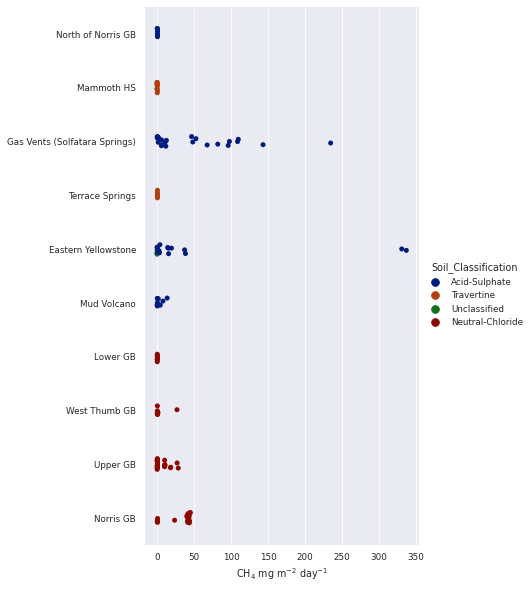

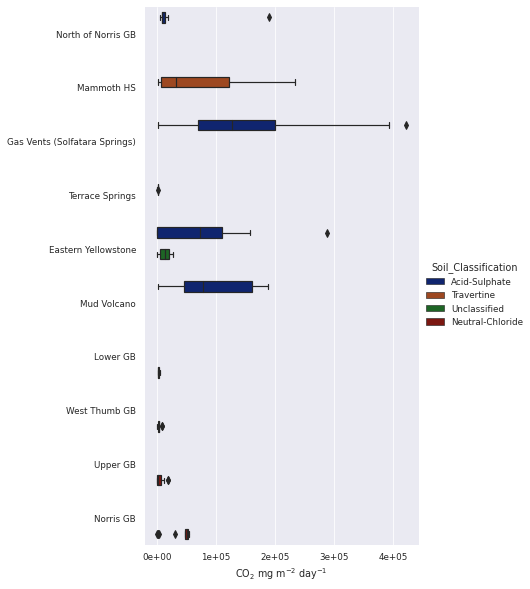

In [66]:
# Import formatting package
import matplotlib.ticker as ticker

# Set theme (e.g., visual style, color pallette, etc.)
sns.set_theme(context="paper", style="darkgrid", palette="dark")

# Boxplot fluxes by group (i.e. site)
## CH4
p_CH4_flx = sns.catplot(x="CH4_Flux", y="Group", data=df_YC_all,
            kind="strip",hue="Soil_Classification",
            orient="h", height=8, aspect=0.8)
p_CH4_flx.set_axis_labels("CH$_4$ mg m$^{-2}$ day$^{-1}$", "")
#p_CH4_flx.set(xscale="log")

## CO2
p_CO2_flx = sns.catplot(x="CO2_Flux", y="Group", data=df_YC_all,
            kind="box",hue="Soil_Classification",
            orient="h", height=8, aspect=0.8)
p_CO2_flx.set_axis_labels("CO$_2$ mg m$^{-2}$ day$^{-1}$", "")
for ax in p_CO2_flx.axes.flat:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: f'{y:2.0e}'))

Having visualized the fluxes and δ<sup>13</sup>C compositions, it is time to quantify the differences between groups using frequentist methods. An analysis of variance (ANOVA) will allow us to compare the means of the fluxes in the groups (site and thermal geochemistry). 